In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dense
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import io
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Flatten
from keras.optimizers import Adam
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
#!gdown --id 1iflIk1AxLMjOL_VW19rr2VHcmmMc7D9Q

In [3]:
from numpy.random import seed
seed(100)

# Loading the data

In [4]:
main_df = pd.read_csv("Features_and_Target.csv")

In [5]:
main_df

,permno,yyyymm,ticker,r1m,close_price,AnnouncementReturn,betaVIX,BookLeverage,ConvDebt,DolVol,...,Consumer_sentiment,Date_encode,Investor_sentiment_3MA,Investor_sentiment_6MA,News_sentiment_3MA,News_sentiment_6MA,Consumer_sentiment_3MA,Consumer_sentiment_6MA,forward_return,target
0,24643,199208,AA,-11.830509,64.625,-0.034219,-0.002155,-1.991768,-1.0,-6.319875,...,0.3805,1,NaN,NaN,NaN,NaN,NaN,NaN,2.514507,1
1,24643,199209,AA,2.514507,66.250,-0.034219,-0.001269,-1.991768,-1.0,-6.289308,...,0.3780,2,NaN,NaN,NaN,NaN,NaN,NaN,5.283019,1
2,24643,199210,AA,5.283019,69.750,0.002048,-0.001911,-1.991768,-1.0,-6.103797,...,0.3665,3,0.422500,NaN,0.487161,NaN,0.375000,NaN,1.111111,1
3,24643,199211,AA,1.111111,70.125,0.002048,0.000085,-1.991768,-1.0,-5.755551,...,0.4265,4,0.481250,NaN,0.488176,NaN,0.390333,NaN,2.139037,1
4,24643,199212,AA,2.139037,71.625,0.002048,-0.006525,-1.991768,-1.0,-6.073234,...,0.4550,5,0.569167,NaN,0.530369,NaN,0.416000,NaN,3.839441,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28594,89070,201412,ZMH,1.202242,113.420,0.030118,0.000256,-1.521382,0.0,-8.063711,...,0.4680,269,0.616750,0.590042,0.566568,0.545846,0.448833,0.431833,-1.163816,0
28595,89070,201501,ZMH,-1.163816,112.100,-0.013885,0.005394,-1.521382,0.0,-7.463536,...,0.4905,270,0.622750,0.601208,0.590869,0.561545,0.467500,0.445417,7.395184,1
28596,89070,201502,ZMH,7.395184,120.390,-0.013885,-0.002619,-1.521382,0.0,-7.653775,...,0.4770,271,0.598583,0.604125,0.594520,0.571278,0.478500,0.456167,-2.201182,0
28597,89070,201503,ZMH,-2.201182,117.520,-0.013885,0.004160,-1.521382,0.0,-8.047728,...,0.4650,272,0.576917,0.596833,0.581778,0.574173,0.477500,0.463167,-6.535058,0


In [6]:
len(main_df["ticker"].unique())

137

# Preprocessing the data

In [7]:
##Eliminating the missing data
main_df.dropna(subset=['News_sentiment_3MA', 'Consumer_sentiment_3MA', 'Investor_sentiment_3MA','betaVIX', 
           'BookLeverage', 'ConvDebt', 'DolVol', 'hire', 'IdioVol3F', 'IndMom', 'MaxRet',
           'OPLeverage', 'PctAcc', 'RDIPO', 'ReturnSkew', 'Size', 'STreversal','zerotradeAlt1'], inplace=True)

In [8]:
main_df

,permno,yyyymm,ticker,r1m,close_price,AnnouncementReturn,betaVIX,BookLeverage,ConvDebt,DolVol,...,Consumer_sentiment,Date_encode,Investor_sentiment_3MA,Investor_sentiment_6MA,News_sentiment_3MA,News_sentiment_6MA,Consumer_sentiment_3MA,Consumer_sentiment_6MA,forward_return,target
2,24643,199210,AA,5.283019,69.750,0.002048,-0.001911,-1.991768,-1.0,-6.103797,...,0.3665,3,0.422500,NaN,0.487161,NaN,0.375000,NaN,1.111111,1
3,24643,199211,AA,1.111111,70.125,0.002048,0.000085,-1.991768,-1.0,-5.755551,...,0.4265,4,0.481250,NaN,0.488176,NaN,0.390333,NaN,2.139037,1
4,24643,199212,AA,2.139037,71.625,0.002048,-0.006525,-1.991768,-1.0,-6.073234,...,0.4550,5,0.569167,NaN,0.530369,NaN,0.416000,NaN,3.839441,1
5,24643,199301,AA,3.839441,74.375,-0.034033,0.003535,-1.991768,-1.0,-6.045333,...,0.4465,6,0.635167,0.528833,0.577251,0.532206,0.442667,0.408833,-5.176470,0
6,24643,199302,AA,-5.176470,70.125,-0.034033,-0.006632,-1.991768,-1.0,-6.001115,...,0.4330,7,0.621000,0.551125,0.606878,0.547527,0.444833,0.417583,-8.021390,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28594,89070,201412,ZMH,1.202242,113.420,0.030118,0.000256,-1.521382,0.0,-8.063711,...,0.4680,269,0.616750,0.590042,0.566568,0.545846,0.448833,0.431833,-1.163816,0
28595,89070,201501,ZMH,-1.163816,112.100,-0.013885,0.005394,-1.521382,0.0,-7.463536,...,0.4905,270,0.622750,0.601208,0.590869,0.561545,0.467500,0.445417,7.395184,1
28596,89070,201502,ZMH,7.395184,120.390,-0.013885,-0.002619,-1.521382,0.0,-7.653775,...,0.4770,271,0.598583,0.604125,0.594520,0.571278,0.478500,0.456167,-2.201182,0
28597,89070,201503,ZMH,-2.201182,117.520,-0.013885,0.004160,-1.521382,0.0,-8.047728,...,0.4650,272,0.576917,0.596833,0.581778,0.574173,0.477500,0.463167,-6.535058,0


In [9]:
#Transform the data, dividing it by 100
main_df['forward_return_div100'] = main_df['forward_return']/100

In [10]:
#Rolling data set preset
start_year = 1992  # Start year of your dataset
training_years = 8
validation_years = 2
testing_years = 5

train_end_year = start_year + training_years - 1
valid_end_year = train_end_year + validation_years
test_end_year = valid_end_year + testing_years

# Initialize lists to store the splits
training_splits = []
validation_splits = []
testing_splits = []


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit

In [12]:
#Extract year from yyyymm so that it can work well!
main_df['year'] = main_df['yyyymm'].astype(str).str[:4]

In [13]:
main_df['year']

2        1992
3        1992
4        1992
5        1993
6        1993
         ... 
28594    2014
28595    2015
28596    2015
28597    2015
28598    2015
Name: year, Length: 26890, dtype: object

In [14]:
main_df['year'] = main_df['year'].astype(int)

In [15]:
main_df['Date'] = pd.to_datetime(main_df['yyyymm'], format='%Y%m', errors='coerce').dropna()

In [16]:
main_df['yyyymm'] = main_df['yyyymm'].astype('int')

In [17]:
# Split the data into features and target
data_use = main_df[['year', "yyyymm", 'Investor_sentiment_3MA', 'News_sentiment_3MA',
          "Consumer_sentiment_3MA", "betaVIX", "BookLeverage", "ConvDebt", "DolVol", "hire",
          "IdioVol3F", "IndMom", "MaxRet", "OPLeverage", "PctAcc", "PctTotAcc", "Price", "RDIPO", "ReturnSkew", "Size",
          "STreversal", "zerotradeAlt1", 'forward_return_div100']]

# Scale the data
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# data_use_scaled = scaler.fit_transform(data_use)

# Convert the data into 3D tensors for the CNN model
# X_scaled = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

In [18]:
##Rolling forward!
while test_end_year <= 2022:  # Assuming your dataset goes up to 2020
    # Select the data for the current split
    train_data = data_use[(main_df['year'] >= start_year) & (data_use['year'] <= train_end_year)]
    valid_data = data_use[(main_df['year'] > train_end_year) & (data_use['year'] <= valid_end_year)]
    test_data = data_use[(main_df['year'] > valid_end_year) & (data_use['year'] <= test_end_year)]


    # Append the data to the respective lists
    training_splits.append(train_data)
    validation_splits.append(valid_data)
    testing_splits.append(test_data)

    # Update the start and end years for the next split
    start_year += 5
    train_end_year += 5
    valid_end_year += 5
    test_end_year += 5

In [19]:
# Define a function for creating and training a neural network model
def create_and_train_nn(X_train, y_train, X_valid, y_valid, X_test, y_test):
    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    X_test = scaler.transform(X_test)

    # Create a simple feedforward neural network model
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)  # Output layer
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=40, batch_size=64)

    # Evaluate the model on the test data
    # y_pred = model.predict(X_test)
    # mse = mean_squared_error(y_test, y_pred)
    return model, history


In [20]:
##Train the model 

trained_models = []
trained_history = []
for train_data, valid_data, test_data in zip(training_splits, validation_splits, testing_splits):
    X_train = train_data[['News_sentiment_3MA', 'Consumer_sentiment_3MA', 'Investor_sentiment_3MA','betaVIX', 
           'BookLeverage', 'ConvDebt', 'DolVol', 'hire', 'IdioVol3F', 'IndMom', 'MaxRet',
           'OPLeverage', 'PctAcc', 'RDIPO', 'ReturnSkew', 'Size', 'STreversal','zerotradeAlt1']]##Extract Training set
    y_train = train_data[["forward_return_div100"]]##Extract training set
    X_valid = valid_data[['News_sentiment_3MA', 'Consumer_sentiment_3MA', 'Investor_sentiment_3MA','betaVIX', 
           'BookLeverage', 'ConvDebt', 'DolVol', 'hire', 'IdioVol3F', 'IndMom', 'MaxRet',
           'OPLeverage', 'PctAcc', 'RDIPO', 'ReturnSkew', 'Size', 'STreversal','zerotradeAlt1']]##Extract validation set
    y_valid = valid_data[["forward_return_div100"]]##Extract validation set
    X_test = test_data[['News_sentiment_3MA', 'Consumer_sentiment_3MA', 'Investor_sentiment_3MA','betaVIX', 
           'BookLeverage', 'ConvDebt', 'DolVol', 'hire', 'IdioVol3F', 'IndMom', 'MaxRet',
           'OPLeverage', 'PctAcc', 'RDIPO', 'ReturnSkew', 'Size', 'STreversal','zerotradeAlt1']]##Extract testing test
    y_test = test_data[["forward_return_div100"]]##Extract testing set

    model, history = create_and_train_nn(X_train, y_train, X_valid, y_valid, X_test, y_test)

    trained_models.append(model)#Obtain the trained model

    trained_history.append(history)#Obtain model history

    # print(f"Mean Squared Error for this split: {mse}")

Epoch 1/40


  1/102 [..............................] - ETA: 18s - loss: 0.2593

2023-11-02 19:40:34.105939: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


102/102 [==============================] - 0s 2ms/step - loss: 0.0384 - val_loss: 0.0369
Epoch 2/40
102/102 [==============================] - 0s 868us/step - loss: 0.0155 - val_loss: 0.0303
Epoch 3/40
102/102 [==============================] - 0s 859us/step - loss: 0.0124 - val_loss: 0.0287
Epoch 4/40
102/102 [==============================] - 0s 874us/step - loss: 0.0112 - val_loss: 0.0280
Epoch 5/40
102/102 [==============================] - 0s 874us/step - loss: 0.0105 - val_loss: 0.0283
Epoch 6/40
102/102 [==============================] - 0s 860us/step - loss: 0.0100 - val_loss: 0.0271
Epoch 7/40
102/102 [==============================] - 0s 830us/step - loss: 0.0103 - val_loss: 0.0280
Epoch 8/40
102/102 [==============================] - 0s 837us/step - loss: 0.0093 - val_loss: 0.0265
Epoch 9/40
102/102 [==============================] - 0s 863us/step - loss: 0.0090 - val_loss: 0.0268
Epoch 10/40
102/102 [==============================] - 0s 993us/step - loss: 0.0089 - val_loss:

In [21]:
trained_models[1].summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1216      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,329
Trainable params: 3,329
Non-trainable params: 0
_________________________________________________________________


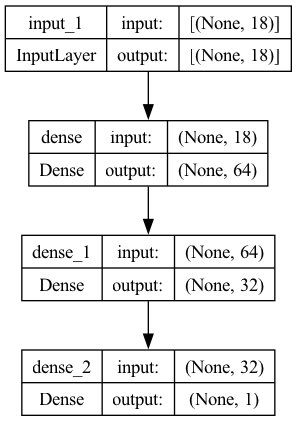

In [22]:
from tensorflow.keras.utils import plot_model

plot_model(trained_models[0], to_file='model.png', show_shapes=True)

In [23]:
trained_history[1].history.keys()

dict_keys(['loss', 'val_loss'])

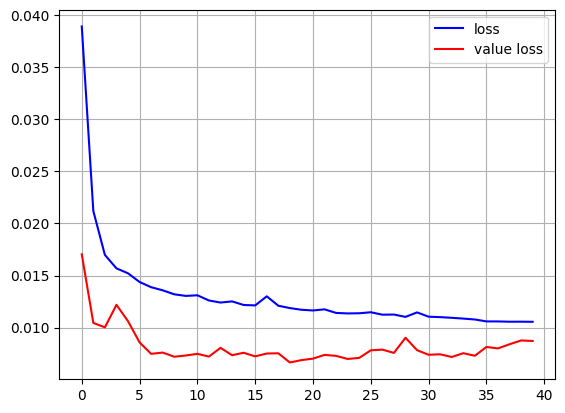

In [24]:
losses_data = pd.DataFrame(trained_history[1].history)
plt.grid(True)
plt.plot(losses_data.index, losses_data["loss"], "-b", label="loss")
plt.plot(losses_data.index, losses_data["val_loss"], "-r", label="value loss")
plt.legend()
plt.show()

In [25]:
losses_data

,loss,val_loss
0,0.038915,0.017043
1,0.021195,0.010454
2,0.016984,0.010030
3,0.015695,0.012190
4,0.015218,0.010620
5,0.014382,0.008585
6,0.013883,0.007485
7,0.013584,0.007608
8,0.013202,0.007209
9,0.013047,0.007326


# Testing the data

In [26]:
#Obtain the data testing sample, date range from 2007-2012
Date_holder = testing_splits[1]["yyyymm"].unique()

In [27]:
# type(testing_splits[1])

In [28]:
# Test_df = testing_splits[1]

In [29]:
# Test_df.reset_index(inplace = True, drop = True)

In [30]:
# Test_df

In [31]:
# Test_data = Test_df[Test_df['yyyymm'] == 201108]
# Test_data.reset_index(inplace = True, drop = True)
# Test_data

In [32]:
# X_test = Test_data[['Investor_sentiment_3MA', 'News_sentiment_3MA',
#       "Consumer_sentiment_3MA", "betaVIX", "BookLeverage", "ConvDebt", "DolVol", "hire",
#       "IdioVol3F", "IndMom", "MaxRet", "OPLeverage", "PctAcc", "PctTotAcc", "Price", "RDIPO", 
#       "ReturnSkew", "Size", "STreversal", "zerotradeAlt1"]]#Form the input
# y_pred = trained_models[1].predict(X_test)#Get prediction
# #Get the top 20
# y_pred_df = pd.DataFrame(y_pred)
# y_pred_df.columns = ['y_pred']
# Test_data = pd.merge(Test_data, y_pred_df, left_index=True, right_index=True)

In [33]:
# Test_data

In [34]:
# top_20 = pd.DataFrame(Test_data.sort_values(by='y_pred', ascending=False).head(20))
# top_20

In [35]:
#TEST ONLY

# Test_data = Test_df[Test_df['yyyymm'] == 200701]
# X_test = Test_data[['Investor_sentiment_3MA', 'News_sentiment_3MA',
#           "Consumer_sentiment_3MA", "betaVIX", "BookLeverage", "ConvDebt", "DolVol", "hire",
#           "IdioVol3F", "IndMom", "MaxRet", "OPLeverage", "PctAcc", "PctTotAcc", "Price", "RDIPO", 
#           "ReturnSkew", "Size", "STreversal", "zerotradeAlt1"]]#Form the input
# y_pred = trained_models[1].predict(X_test)#Get prediction
# #Get the top 20
# y_pred_df = pd.DataFrame(y_pred)
# # Rank the values in descending order and select the top 20


In [36]:
# top_20 = pd.DataFrame(y_pred_df.iloc[:, 0].sort_values(ascending=False).head(20))
# top_20.columns = ['y_pred']
# top_20['weight']=0.05
# top_20['return'] = top_20['weight'] * top_20['y_pred']

In [37]:
# top_20_return = top_20['return'].sum()

In [38]:
#Using testing sample from 2007 to 2012 to see whether it works well
portfolio_returns = []
Test_df = testing_splits[1].reset_index()

for Date in Date_holder:#Date rolling forwards(5 years equals 60 months, which means the cycle is 60)
    Test_data = Test_df[Test_df['yyyymm'] == Date]#Filter the data by date
    Test_data.reset_index(inplace = True, drop = True)
    X_test = Test_data[['News_sentiment_3MA', 'Consumer_sentiment_3MA', 'Investor_sentiment_3MA','betaVIX', 
           'BookLeverage', 'ConvDebt', 'DolVol', 'hire', 'IdioVol3F', 'IndMom', 'MaxRet',
           'OPLeverage', 'PctAcc', 'RDIPO', 'ReturnSkew', 'Size', 'STreversal','zerotradeAlt1']]#Form the input
    y_pred = trained_models[1].predict(X_test)#Get prediction
    #Get the top 20
    y_pred_df = pd.DataFrame(y_pred)
    # Rank the values in descending order and select the top 20
    y_pred_df.columns = ['y_pred']
    Test_data = pd.merge(Test_data, y_pred_df, left_index=True, right_index=True)
    top_20 = pd.DataFrame(Test_data.sort_values(by='y_pred', ascending=False).head(20))
    top_20['weight']=0.05
    top_20['return'] = top_20['weight'] * top_20['forward_return_div100']
    top_20_return = top_20['return'].sum()
    # Append the portfolio return to the list
    portfolio_returns.append(top_20_return)
    cumulative_return = np.cumprod(np.array(portfolio_returns) + 1)

# Display the list of portfolio returns
print(cumulative_return)

3/3 [==============================] - 0s 927us/step


3/3 [==============================] - 0s 770us/step
[1.00158164 0.99681396 1.03094714 1.0727448  1.06536473 1.02565916
 1.04367757 1.10120791 1.12534986 1.07927795 1.07195546 1.04277613
 1.00262069 0.99188292 1.05335822 1.10156965 0.99359243 0.97810389
 1.00636178 0.88931717 0.71012233 0.67650131 0.70977656 0.65040567
 0.63237781 0.71083516 0.80427834 0.85467817 0.87353092 0.95532458
 0.99578144 1.04023096 1.04491068 1.12994944 1.17286966 1.15792646
 1.20675628 1.26425088 1.32584415 1.23145773 1.18668825 1.27663483
 1.22789524 1.33782414 1.39215737 1.36186855 1.43776536 1.49966829
 1.53123469 1.536866   1.58882366 1.57896925 1.56183303 1.47432431
 1.48166133 1.42704569 1.58426621 1.57368345 1.61105864 1.60436564]


In [39]:
top_20_return

-0.004154415170000001

In [40]:
#Clean the dataframe for plotting
cum_return_df = pd.DataFrame({"cum_return": cumulative_return, "Date": Date_holder})
# cum_return_df.columns = ['cum_return', "Date"]
cum_return_df["Date"] = pd.to_datetime(cum_return_df["Date"], format='%Y%m', errors='coerce')

In [80]:
sp500_2007_2012 = pd.read_csv("sp500_2007_2012.csv")

In [81]:
sp500_2007_2012["Date"] = pd.to_datetime(sp500_2007_2012["Date"], format='%Y%m', errors='coerce')

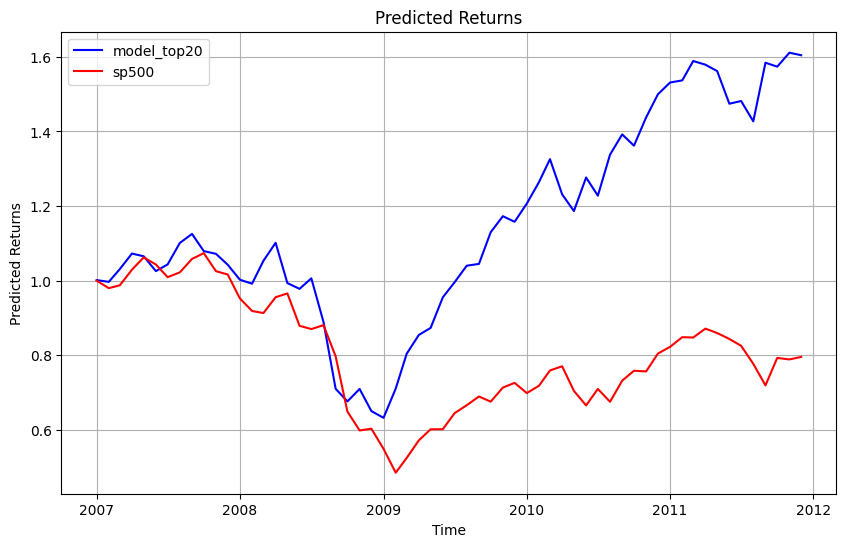

In [82]:
#Plotting
plt.figure(figsize=(10, 6))
plt.plot(cum_return_df["Date"], cum_return_df['cum_return'], "-b", label="model_top20")
plt.plot(sp500_2007_2012["Date"], sp500_2007_2012["SP500_return"], "-r", label = "sp500")
plt.title("Predicted Returns")
plt.xlabel("Time")
plt.ylabel("Predicted Returns")
plt.legend()
plt.grid(True)

In [42]:
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_pred, alpha=0.5)
# plt.title("Actual vs. Predicted Values")
# plt.xlabel("Actual Values")
# plt.ylabel("Predicted Values")
# plt.grid(True)

# # Add a 45-degree reference line for comparison
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
# plt.show()

In [43]:
Test_df = main_df[main_df['yyyymm'] > 200201].reset_index()

In [70]:
#Using data from starting from 2002
Test_df = main_df[main_df['yyyymm'] >= 200201].reset_index()
Date_holder = Test_df["yyyymm"].unique()
portfolio_returns_top20 = []
portfolio_returns_top10 = []
portfolio_returns_top5 = []
portfolio_returns_randamu = []

for Date in Date_holder:#Date rolling forwards(5 years equals 60 months, which means the cycle is 60)
    Test_data = Test_df[Test_df['yyyymm'] == Date]#Filter the data by date
    Test_data.reset_index(inplace = True, drop = True)
    X_test = Test_data[['News_sentiment_3MA', 'Consumer_sentiment_3MA', 'Investor_sentiment_3MA','betaVIX', 
           'BookLeverage', 'ConvDebt', 'DolVol', 'hire', 'IdioVol3F', 'IndMom', 'MaxRet',
           'OPLeverage', 'PctAcc', 'RDIPO', 'ReturnSkew', 'Size', 'STreversal','zerotradeAlt1']]#Form the input
    y_pred = trained_models[1].predict(X_test)#Get prediction
    #Get the top 20
    y_pred_df = pd.DataFrame(y_pred)
    # Rank the values in descending order and select the top 20
    y_pred_df.columns = ['y_pred']
    Test_data = pd.merge(Test_data, y_pred_df, left_index=True, right_index=True)
    top_20 = pd.DataFrame(Test_data.sort_values(by='y_pred', ascending=False).head(20))
    top_20['weight']=0.05
    top_20['return'] = top_20['weight'] * top_20['forward_return_div100']
    top_20_return = top_20['return'].sum()
    top_10 = pd.DataFrame(Test_data.sort_values(by='y_pred', ascending=False).head(10))
    top_10['weight']=0.1
    top_10['return'] = top_10['weight'] * top_10['forward_return_div100']
    top_10_return = top_10['return'].sum()
    top_5 = pd.DataFrame(Test_data.sort_values(by='y_pred', ascending=False).head(5))
    top_5['weight']=0.2
    top_5['return'] = top_5['weight'] * top_5['forward_return_div100']
    top_5_return = top_5['return'].sum()
    Randamu = pd.DataFrame(Test_data.sample(n=20, random_state=42))
    Randamu['weight']=0.05
    Randamu['return'] = Randamu['weight'] * Randamu['forward_return_div100']
    Randamu_return = Randamu['return'].sum()
    
    # Append the portfolio return to the list
    portfolio_returns_top20.append(top_20_return)
    portfolio_returns_top10.append(top_10_return)
    portfolio_returns_top5.append(top_5_return)
    portfolio_returns_randamu.append(Randamu_return)
    
cumulative_return_top20 = np.cumprod(np.array(portfolio_returns_top20) + 1)
cumulative_return_top10 = np.cumprod(np.array(portfolio_returns_top10) + 1)
cumulative_return_top5 = np.cumprod(np.array(portfolio_returns_top5) + 1)
cumulative_return_randamu = np.cumprod(np.array(portfolio_returns_randamu) + 1)

3/3 [==============================] - 0s 727us/step


In [140]:
#Transform the cumulative return dataset
cum_return_df_top20 = pd.DataFrame({"cum_return_top20": cumulative_return_top20, "Date": Date_holder})
# cum_return_df.columns = ['cum_return', "Date"]
cum_return_df_top20["Date"] = pd.to_datetime(cum_return_df_top20["Date"], format='%Y%m', errors='coerce')
cum_return_df_top10 = pd.DataFrame({"cum_return_top10": cumulative_return_top10, "Date": Date_holder})
cum_return_df_top10["Date"] = pd.to_datetime(cum_return_df_top10["Date"], format='%Y%m', errors='coerce')
cum_return_df_top5 = pd.DataFrame({"cum_return_top5": cumulative_return_top5, "Date": Date_holder})
cum_return_df_top5["Date"] = pd.to_datetime(cum_return_df_top5["Date"], format='%Y%m', errors='coerce')
cum_return_df_randamu = pd.DataFrame({"cum_return_randamu": cumulative_return_randamu, "Date": Date_holder})
cum_return_df_randamu["Date"] = pd.to_datetime(cum_return_df_randamu["Date"], format='%Y%m', errors='coerce')

In [110]:
#Transform the cumulative return dataset
portfolio_returns_top20_df = pd.DataFrame({"return_top20": portfolio_returns_top20, "Date": Date_holder})
# cum_return_df.columns = ['cum_return', "Date"]
portfolio_returns_top20_df["Date"] = pd.to_datetime(portfolio_returns_top20_df["Date"], format='%Y%m', errors='coerce')
portfolio_returns_top10_df = pd.DataFrame({"return_top10": portfolio_returns_top10, "Date": Date_holder})
portfolio_returns_top10_df["Date"] = pd.to_datetime(portfolio_returns_top10_df["Date"], format='%Y%m', errors='coerce')
portfolio_returns_top5_df = pd.DataFrame({"return_top5": portfolio_returns_top5, "Date": Date_holder})
portfolio_returns_top5_df["Date"] = pd.to_datetime(portfolio_returns_top5_df["Date"], format='%Y%m', errors='coerce')
portfolio_returns_randamu_df = pd.DataFrame({"return_randamu": portfolio_returns_randamu, "Date": Date_holder})
portfolio_returns_randamu_df["Date"] = pd.to_datetime(portfolio_returns_randamu_df["Date"], format='%Y%m', errors='coerce')

In [103]:
cum_return_df_randamu["Date"].max()

Timestamp('2021-09-01 00:00:00')

In [104]:
sp500_return = pd.read_csv("S&P_Cumulative_Return.csv")

In [105]:
sp500_return

,Date,SP500_Return
0,200202,0.986402
1,200203,1.021992
2,200204,0.957213
3,200205,0.948480
4,200206,0.877141
...,...,...
231,202105,3.006675
232,202106,3.072735
233,202107,3.141850
234,202108,3.231638


In [106]:
sp500_return["Date"] = pd.to_datetime(sp500_return["Date"], format='%Y%m', errors='coerce')

In [107]:
sp_ff = pd.read_csv("S&P F-F_Research_Data_Factors_2002_2022.csv")
sp_ff["Date"] = pd.to_datetime(sp_ff["Date"], format='%Y%m', errors='coerce')

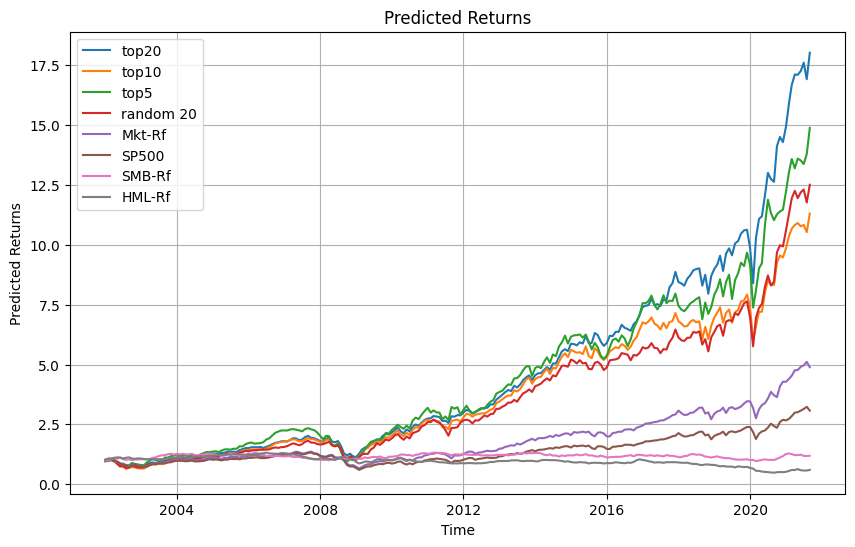

In [141]:
#Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(cum_return_df_top20["Date"], cum_return_df_top20['cum_return_top20'], label="top20")
plt.plot(cum_return_df_top10["Date"], cum_return_df_top10['cum_return_top10'], label="top10")
plt.plot(cum_return_df_top5["Date"], cum_return_df_top5['cum_return_top5'], label="top5")
plt.plot(cum_return_df_randamu["Date"], cum_return_df_randamu['cum_return_randamu'], label="random 20")
plt.plot(sp_ff["Date"], sp_ff['Mkt-Rf_Cum'], label="Mkt-Rf")
plt.plot(sp500_return["Date"], sp500_return["SP500_Return"], label="SP500")
plt.plot(sp_ff["Date"], sp_ff['SMB-Rf_Cum'], label="SMB-Rf")
plt.plot(sp_ff["Date"], sp_ff['HML-RF_Cum'], label="HML-Rf")
plt.title("Predicted Returns")
plt.xlabel("Time")
plt.ylabel("Predicted Returns")
plt.legend()
plt.grid(True)

### Test the model against fama french

In [146]:
#Data all mesh together
all_in_one = pd.merge(portfolio_returns_top20_df, 
                      pd.merge(portfolio_returns_top10_df, 
                               pd.merge(portfolio_returns_top5_df, 
                                        pd.merge(portfolio_returns_randamu_df, 
                                                 pd.merge(sp_ff, sp500_return, on = "Date"), on = "Date"), on = "Date"), on = "Date"), on = "Date")

In [147]:
all_in_one = pd.merge(all_in_one, 
                       pd.merge(cum_return_df_top20,
                                pd.merge(cum_return_df_top10, 
                                         pd.merge(cum_return_df_top5, cum_return_df_randamu))))

In [148]:
all_in_one

,return_top20,Date,return_top10,return_top5,return_randamu,Mkt-RF,Mkt-Rf_div100,SMB,HML,RF,...,SMB-Rf,HML-RF,Mkt-Rf_Cum,SMB-Rf_Cum,HML-RF_Cum,SP500_Return,cum_return_top20,cum_return_top10,cum_return_top5,cum_return_randamu
0,0.067724,2002-02-01,0.078373,0.134365,0.051646,-2.29,-0.0229,-1.01,2.16,0.13,...,-0.0114,0.0203,0.963030,0.998980,1.053970,0.986402,1.053477,1.052308,1.076740,1.054291
1,-0.018798,2002-03-01,-0.015902,-0.008178,-0.038263,4.24,0.0424,4.21,1.06,0.13,...,0.0408,0.0093,1.003862,1.039739,1.063772,1.021992,1.033674,1.035575,1.067935,1.013951
2,-0.022914,2002-04-01,-0.059388,-0.052573,-0.033135,-5.20,-0.0520,5.96,3.88,0.15,...,0.0581,0.0373,0.951661,1.100148,1.103451,0.957213,1.009988,0.974074,1.011790,0.980354
3,-0.109013,2002-05-01,-0.129247,-0.084096,-0.111052,-1.38,-0.0138,-3.21,1.53,0.14,...,-0.0335,0.0139,0.938528,1.063293,1.118788,0.948480,0.899887,0.848178,0.926703,0.871484
4,-0.089830,2002-06-01,-0.139064,-0.121365,-0.131493,-7.21,-0.0721,4.29,-0.05,0.13,...,0.0416,-0.0018,0.870861,1.107526,1.116775,0.877141,0.819050,0.730227,0.814234,0.756889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,-0.000558,2021-05-01,0.007270,0.030607,-0.024812,0.29,0.0029,-0.25,7.09,0.00,...,-0.0025,0.0709,4.771061,1.212823,0.631786,3.006675,17.103172,10.908442,13.599796,11.950366
232,0.009043,2021-06-01,-0.012560,-0.005643,0.020176,2.75,0.0275,1.68,-7.87,0.00,...,0.0168,-0.0787,4.902265,1.233199,0.582064,3.072735,17.257829,10.771431,13.523057,12.191476
233,0.020307,2021-07-01,0.005328,-0.010992,0.009700,1.27,0.0127,-3.97,-1.78,0.00,...,-0.0397,-0.0178,4.964524,1.184241,0.571703,3.141850,17.608275,10.828823,13.374407,12.309734
234,-0.039291,2021-08-01,-0.027641,0.031404,-0.044130,2.91,0.0291,-0.42,-0.15,0.00,...,-0.0042,-0.0015,5.108991,1.179267,0.570846,3.231638,16.916429,10.529504,13.794422,11.766507


In [149]:
all_in_one["RF_div100"] = all_in_one["RF"]/100

In [132]:
all_in_one

,return_top20,Date,return_top10,return_top5,return_randamu,Mkt-RF,Mkt-Rf_div100,SMB,HML,RF,...,HML-RF,Mkt-Rf_Cum,SMB-Rf_Cum,HML-RF_Cum,SP500_Return,top20-RF,top10-RF,top5-RF,randamu-RF,RF_div100
0,0.067724,2002-02-01,0.078373,0.134365,0.051646,-2.29,-0.0229,-1.01,2.16,0.13,...,0.0203,0.963030,0.998980,1.053970,0.986402,-0.062276,-0.051627,0.004365,-0.078354,0.0013
1,-0.018798,2002-03-01,-0.015902,-0.008178,-0.038263,4.24,0.0424,4.21,1.06,0.13,...,0.0093,1.003862,1.039739,1.063772,1.021992,-0.148798,-0.145902,-0.138178,-0.168263,0.0013
2,-0.022914,2002-04-01,-0.059388,-0.052573,-0.033135,-5.20,-0.0520,5.96,3.88,0.15,...,0.0373,0.951661,1.100148,1.103451,0.957213,-0.172914,-0.209388,-0.202573,-0.183135,0.0015
3,-0.109013,2002-05-01,-0.129247,-0.084096,-0.111052,-1.38,-0.0138,-3.21,1.53,0.14,...,0.0139,0.938528,1.063293,1.118788,0.948480,-0.249013,-0.269247,-0.224096,-0.251052,0.0014
4,-0.089830,2002-06-01,-0.139064,-0.121365,-0.131493,-7.21,-0.0721,4.29,-0.05,0.13,...,-0.0018,0.870861,1.107526,1.116775,0.877141,-0.219830,-0.269064,-0.251365,-0.261493,0.0013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,-0.000558,2021-05-01,0.007270,0.030607,-0.024812,0.29,0.0029,-0.25,7.09,0.00,...,0.0709,4.771061,1.212823,0.631786,3.006675,-0.000558,0.007270,0.030607,-0.024812,0.0000
232,0.009043,2021-06-01,-0.012560,-0.005643,0.020176,2.75,0.0275,1.68,-7.87,0.00,...,-0.0787,4.902265,1.233199,0.582064,3.072735,0.009043,-0.012560,-0.005643,0.020176,0.0000
233,0.020307,2021-07-01,0.005328,-0.010992,0.009700,1.27,0.0127,-3.97,-1.78,0.00,...,-0.0178,4.964524,1.184241,0.571703,3.141850,0.020307,0.005328,-0.010992,0.009700,0.0000
234,-0.039291,2021-08-01,-0.027641,0.031404,-0.044130,2.91,0.0291,-0.42,-0.15,0.00,...,-0.0015,5.108991,1.179267,0.570846,3.231638,-0.039291,-0.027641,0.031404,-0.044130,0.0000


In [150]:
all_in_one["top20-RF"] = all_in_one["return_top20"] - all_in_one["RF_div100"]
all_in_one["top10-RF"] = all_in_one["return_top10"] - all_in_one["RF_div100"]
all_in_one["top5-RF"] = all_in_one["return_top5"] - all_in_one["RF_div100"]
all_in_one["randamu-RF"] = all_in_one["return_randamu"] - all_in_one["RF_div100"]

In [117]:
import statsmodels.api as sm

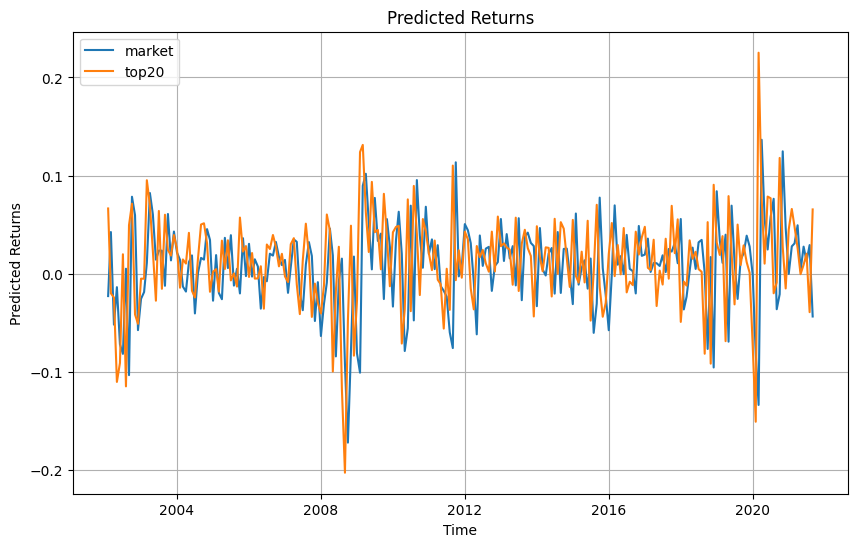

In [151]:
plt.figure(figsize=(10, 6))
plt.plot(all_in_one["Date"], all_in_one['Mkt-Rf_div100'], label="market")
plt.plot(all_in_one["Date"], all_in_one['top20-RF'], label="top20")
plt.title("Predicted Returns")
plt.xlabel("Time")
plt.ylabel("Predicted Returns")
plt.legend()
plt.grid(True)

In [152]:
x = all_in_one['Mkt-Rf_div100'].tolist()
y = all_in_one['top20-RF'].tolist()
x = sm.add_constant(x)
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.2102
Date:                Thu, 02 Nov 2023   Prob (F-statistic):              0.647
Time:                        23:10:26   Log-Likelihood:                 385.35
No. Observations:                 236   AIC:                            -766.7
Df Residuals:                     234   BIC:                            -759.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0123      0.003      3.908      0.0

In [153]:
x = all_in_one['Mkt-Rf_div100'].tolist()
y = all_in_one['top10-RF'].tolist()
x = sm.add_constant(x)
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.663
Date:                Thu, 02 Nov 2023   Prob (F-statistic):              0.198
Time:                        23:10:27   Log-Likelihood:                 366.86
No. Observations:                 236   AIC:                            -729.7
Df Residuals:                     234   BIC:                            -722.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0100      0.003      2.953      0.0

In [154]:
x = all_in_one['Mkt-Rf_div100'].tolist()
y = all_in_one['top5-RF'].tolist()
x = sm.add_constant(x)
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.030
Date:                Thu, 02 Nov 2023   Prob (F-statistic):              0.156
Time:                        23:10:29   Log-Likelihood:                 330.66
No. Observations:                 236   AIC:                            -657.3
Df Residuals:                     234   BIC:                            -650.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0116      0.004      2.923      0.0

In [155]:
x = all_in_one['Mkt-Rf_div100'].tolist()
y = all_in_one['randamu-RF'].tolist()
x = sm.add_constant(x)
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.2894
Date:                Thu, 02 Nov 2023   Prob (F-statistic):              0.591
Time:                        23:10:32   Log-Likelihood:                 363.23
No. Observations:                 236   AIC:                            -722.5
Df Residuals:                     234   BIC:                            -715.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0108      0.003      3.132      0.0

#### Maximum drawdown

In [156]:
cumulative_returns_top20 = all_in_one['cum_return_top20']
peak_value = cumulative_returns_top20[0]
max_drawdown = 0.0

for value in cumulative_returns_top20:
    if value > peak_value:
        peak_value = value
    else:
        drawdown = (peak_value - value) / peak_value
        max_drawdown = max(max_drawdown, drawdown)

# Convert the maximum drawdown to a percentage
max_drawdown_percentage = max_drawdown * 100

print(f"Maximum Drawdown: {max_drawdown_percentage:.2f}%")

Maximum Drawdown: 43.81%


In [157]:
cumulative_returns_top10 = all_in_one['cum_return_top10']
peak_value = cumulative_returns_top10[0]
max_drawdown = 0.0

for value in cumulative_returns_top10:
    if value > peak_value:
        peak_value = value
    else:
        drawdown = (peak_value - value) / peak_value
        max_drawdown = max(max_drawdown, drawdown)

# Convert the maximum drawdown to a percentage
max_drawdown_percentage = max_drawdown * 100

print(f"Maximum Drawdown: {max_drawdown_percentage:.2f}%")

Maximum Drawdown: 45.65%


In [158]:
cumulative_returns_top5 = all_in_one['cum_return_top5']
peak_value = cumulative_returns_top5[0]
max_drawdown = 0.0

for value in cumulative_returns_top5:
    if value > peak_value:
        peak_value = value
    else:
        drawdown = (peak_value - value) / peak_value
        max_drawdown = max(max_drawdown, drawdown)

# Convert the maximum drawdown to a percentage
max_drawdown_percentage = max_drawdown * 100

print(f"Maximum Drawdown: {max_drawdown_percentage:.2f}%")

Maximum Drawdown: 59.59%


In [159]:
cumulative_returns_randamu = all_in_one['cum_return_randamu']
peak_value = cumulative_returns_randamu[0]
max_drawdown = 0.0

for value in cumulative_returns_randamu:
    if value > peak_value:
        peak_value = value
    else:
        drawdown = (peak_value - value) / peak_value
        max_drawdown = max(max_drawdown, drawdown)

# Convert the maximum drawdown to a percentage
max_drawdown_percentage = max_drawdown * 100

print(f"Maximum Drawdown: {max_drawdown_percentage:.2f}%")

Maximum Drawdown: 44.19%


In [161]:
# Sort the cumulative returns in ascending order
sorted_returns = all_in_one['cum_return_top20'].sort_values()

# Calculate the index for the 10th percentile (90% confidence level)
index = int(0.1 * len(sorted_returns))

# Retrieve the VaR(90) value
var_90 = sorted_returns.iloc[index]

print(f"VaR(90) is: {var_90:.4f}")

VaR(90) is: 1.0812


In [168]:
average_excess_return = all_in_one['randamu-RF'].mean()
std_deviation_excess = all_in_one['randamu-RF'].std()

# Calculate the Sharpe Ratio
sharpe_ratio = (average_excess_return) / std_deviation_excess

# Assuming the data is daily, you can annualize the Sharpe Ratio
annualized_sharpe_ratio = sharpe_ratio * np.sqrt(252)  # Assuming 252 trading days in a year

print(f"Annualized Sharpe Ratio: {annualized_sharpe_ratio:.4f}")

Annualized Sharpe Ratio: 3.3917


### Store the model

In [49]:
import os

# Define a directory where you want to save the models
save_dir = "saved_models"
os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist

# Iterate through your trained models
for i, model in enumerate(trained_models):
    model_name = f"model_{i + 1}.h5"  # Define a unique name for each model
    model_path = os.path.join(save_dir, model_name)  # Full path to save the model

    # Save the model to the specified path
    model.save(model_path)

    print(f"Model {i + 1} saved to {model_path}")

Model 1 saved to saved_models/model_1.h5
Model 2 saved to saved_models/model_2.h5
Model 3 saved to saved_models/model_3.h5
Model 4 saved to saved_models/model_4.h5


In [139]:
all_in_one.to_csv('all_in_one.csv')